In [1]:
%matplotlib inline

In [2]:
import torch
from torch import nn
from captcha_dataset import CaptchaDataset
import matplotlib.pyplot as plt
from model import NeuralNetwork
from utils import draw_boxes, decode_output

In [3]:
img_width, img_height = 110, 40
positions = 13
digit_width = 20
digit_height = 40
position_width = img_width/positions
MODEL_FILE = "model.pt"

In [4]:
model = NeuralNetwork()
checkpoint = torch.load(MODEL_FILE)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [5]:
test_data = CaptchaDataset(1, digit_out=1)
model.eval()
data = test_data[0]
x, y, img = data[0], data[1], data[2]
with torch.no_grad():
    pred = model(x[None, :])
    confidence = torch.sigmoid(pred[0,0,0,:])
    digit_predict = torch.argmax(nn.functional.softmax(pred[0,1:11,0,:], 0), 0)
    box_shift = torch.sigmoid(pred[0,11,0,:])

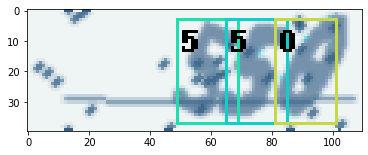

In [6]:
(digits, digit_pos) = decode_output(confidence, box_shift, digit_predict.numpy(), position_width, positions, digit_width)
img_pred = draw_boxes(img, digit_pos, digits, digit_width, digit_height)
plt.imshow(img_pred)

In [7]:
N=1000
model.eval()
e = 0
e_cnt = 0
for i in range(N):
    data = test_data[0]
    x, y, d = data[0], data[1], data[3]
    with torch.no_grad():
        pred = model(x[None, :])
        confidence = torch.clamp(pred[0,0,0,:], 0, 1)
        digit_predict = torch.argmax(nn.functional.softmax(pred[0,1:11,0,:], 0), 0)
        box_shift = torch.sigmoid(pred[0,11,0,:])
        (digits, digit_pos) = decode_output(confidence, box_shift, digit_predict.numpy(), position_width, positions, digit_width)
        if list(digits) != list(d):
            e+=1
        if len(digits) != len(d):
            e_cnt+=1
print(f"Accuracy {100-e/N*100:.1f}%")
print(f"Accuracy digit count {100-e_cnt/N*100:.1f}%")

Accuracy 96.7%
Accuracy digit count 99.1%
